In [101]:
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv("household_power_consumption.txt", sep=';')
df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_12364\3437405430.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("household_power_consumption.txt", sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [103]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [104]:
#convert object type columns to numeric columns
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

In [105]:
df.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [106]:
#combine date with time columns and drop time column
df["Date"] = pd.to_datetime(df["Date"]+ ' ' + df['Time'])
df.drop(columns=['Time'],inplace=True)
df["Date"]

C:\Users\admin\AppData\Local\Temp\ipykernel_12364\1860334476.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"]+ ' ' + df['Time'])


0         2006-12-16 17:24:00
1         2006-12-16 17:25:00
2         2006-12-16 17:26:00
3         2006-12-16 17:27:00
4         2006-12-16 17:28:00
                  ...        
2075254   2010-11-26 20:58:00
2075255   2010-11-26 20:59:00
2075256   2010-11-26 21:00:00
2075257   2010-11-26 21:01:00
2075258   2010-11-26 21:02:00
Name: Date, Length: 2075259, dtype: datetime64[ns]

In [107]:
df

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [108]:
df.set_index("Date",inplace=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [109]:
daily = df.resample("D").mean()
daily

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308062,6.467361,0.000000,1.838889,9.765972
...,...,...,...,...,...,...,...
2010-11-22,1.417733,0.098857,240.197118,6.014167,3.371528,1.465278,7.038889
2010-11-23,1.095511,0.095451,240.575528,4.674444,1.299306,0.318056,5.285417
2010-11-24,1.247394,0.091986,240.030965,5.249583,0.761111,1.977778,8.488889


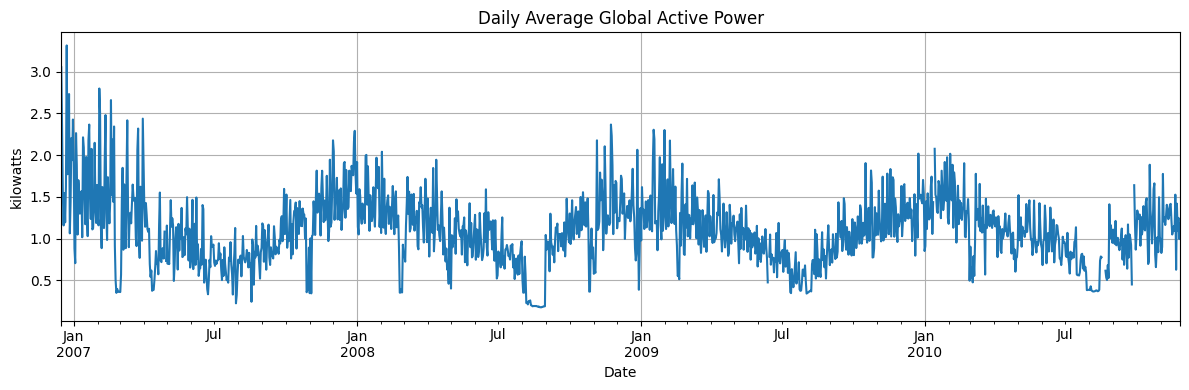

In [111]:
daily["Global_active_power"].plot(figsize=(12, 4), title="Daily Average Global Active Power")
plt.ylabel("kilowatts")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

In [81]:
weekly = df.resample("W").mean()
weekly

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-17,2.505248,0.142118,239.258088,10.664161,1.107298,2.577887,9.949346
2006-12-24,1.734186,0.116707,241.369734,7.341973,1.110339,2.118575,7.684759
2006-12-31,1.958376,0.144109,241.910219,8.238043,1.412681,2.245287,6.671661
2007-01-07,1.484233,0.133825,240.921636,6.262123,0.581052,1.745933,5.376290
2007-01-14,1.604954,0.157782,240.270326,6.831134,1.331481,1.884016,8.270265
...,...,...,...,...,...,...,...
2010-10-31,0.958963,0.126269,244.880781,3.991687,0.591369,0.965476,5.346825
2010-11-07,1.154565,0.134101,242.891289,4.854226,1.124107,1.547619,6.021925
2010-11-14,1.335928,0.111409,238.685010,5.674028,1.595536,1.075298,7.740476


<Axes: xlabel='Date'>

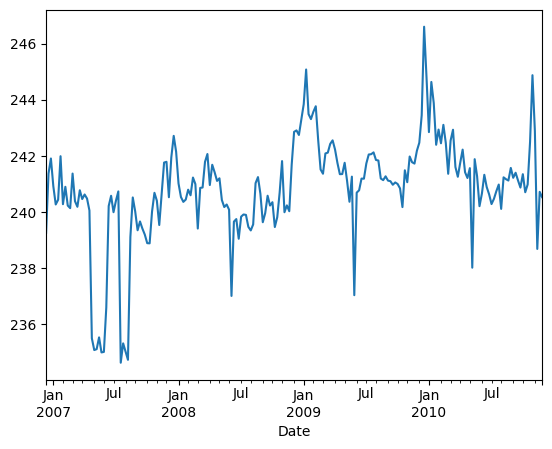

In [82]:
weekly.Voltage.plot()

<Axes: xlabel='Date'>

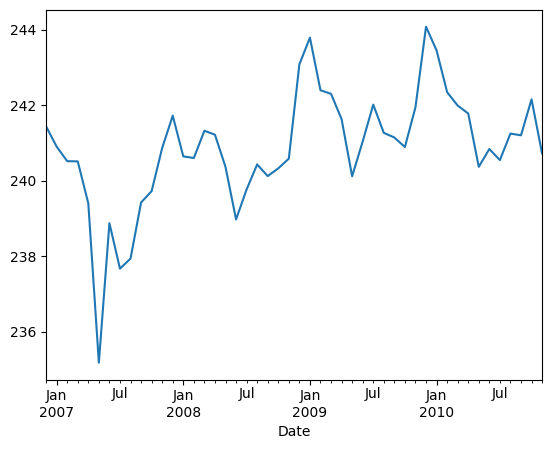

In [83]:
monthly = df.resample('ME').mean()
monthly.Voltage.plot()

<Axes: xlabel='Date'>

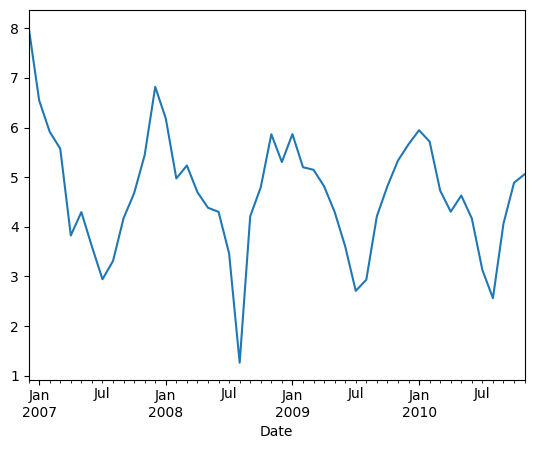

In [84]:
monthly.Global_intensity.plot()

In [85]:
df.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='Date', length=2075259, freq=None)

In [86]:
df.loc['2010-11-26 20:53:00']

Global_active_power        0.944
Global_reactive_power      0.000
Voltage                  238.720
Global_intensity           4.000
Sub_metering_1             0.000
Sub_metering_2             0.000
Sub_metering_3             0.000
Name: 2010-11-26 20:53:00, dtype: float64

<Axes: xlabel='Date'>

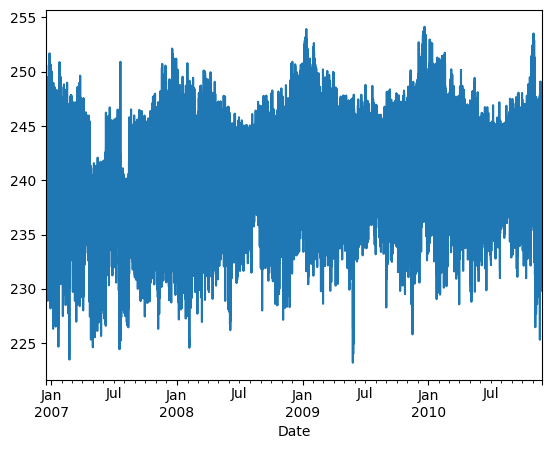

In [87]:
df['Voltage'].plot()

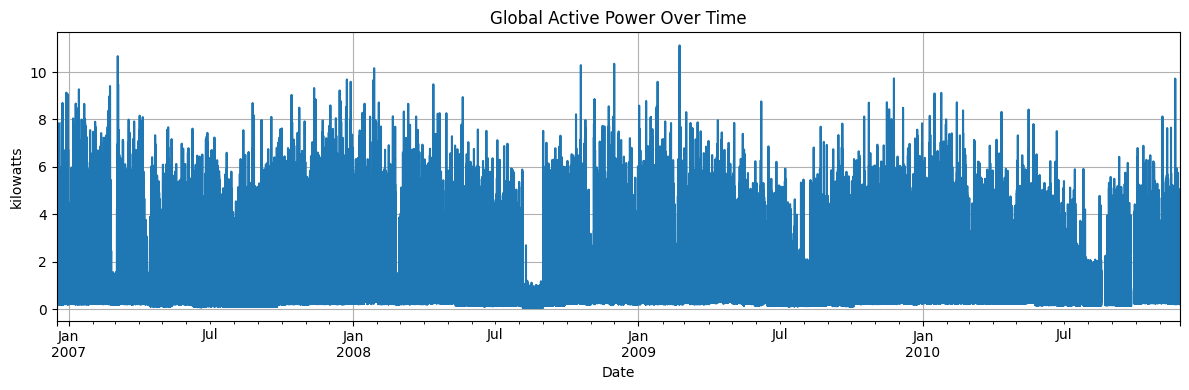

In [90]:
df['Global_active_power'].plot(figsize=(12, 4), title="Global Active Power Over Time")
plt.ylabel("kilowatts")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_12364\1041287776.py:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


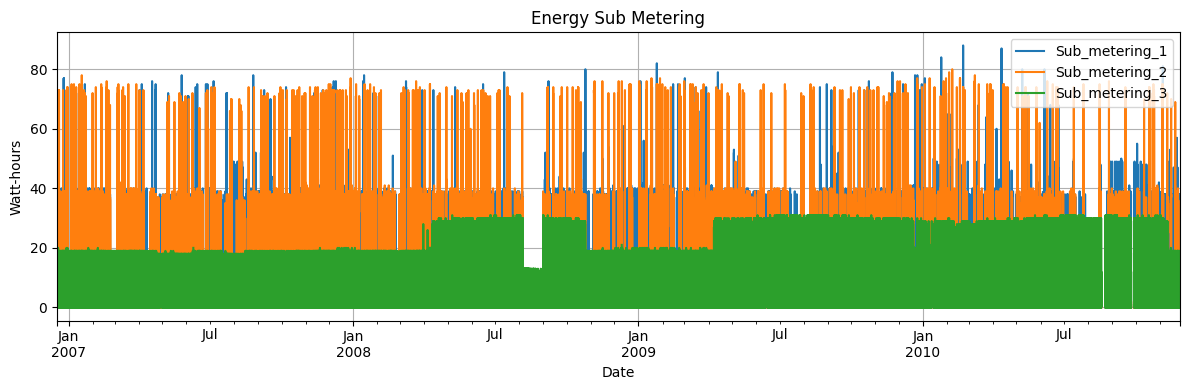

In [91]:
df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].plot(figsize=(12, 4), title="Energy Sub Metering")
plt.ylabel("Watt-hours")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

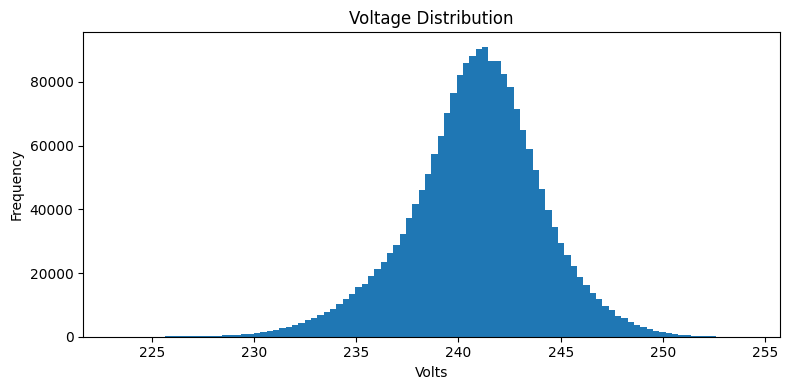

In [93]:
df['Voltage'].plot(kind='hist', bins=100, figsize=(8, 4), title="Voltage Distribution")
plt.xlabel("Volts")
plt.tight_layout()
plt.show()

In [98]:
! pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


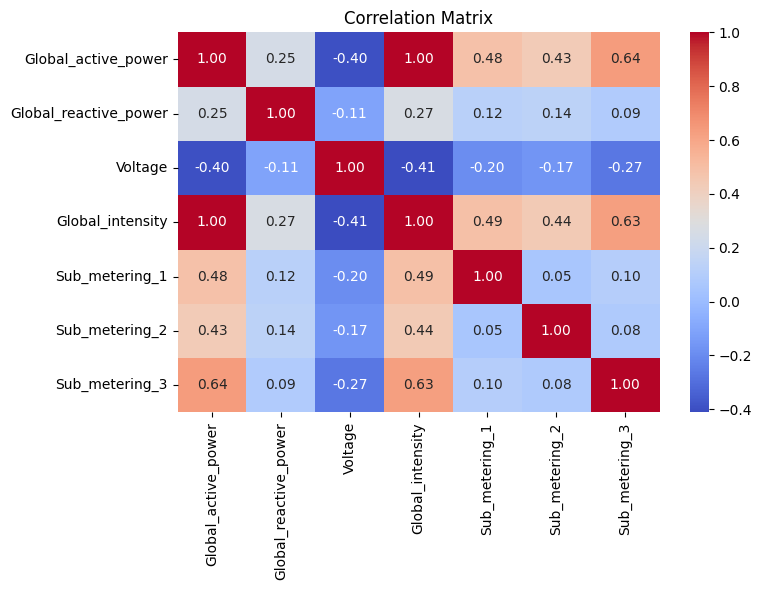

In [99]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [113]:
cor = df.corr()